# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
В работе предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


**Описание тарифов**

- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**<a id='note_1'></a>
>«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файлов

In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
pd.set_option('display.float_format', '{:,.2f}'.format)

***Информация о звонках***

In [487]:
df_users = pd.read_csv('/datasets/users.csv')
display(df_users.head())
print(df_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


***Информация о звонках***

In [488]:
df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls.head())
print(df_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


***Информация о сообщениях***

In [489]:
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages.head())
print(df_messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


***Информация об интернет-сессиях***

In [490]:
df_internet = pd.read_csv('/datasets/internet.csv')
display(df_internet.head())
print(df_internet.info())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


***Информация о тарифах***

In [491]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(df_tariffs.head())
display(df_tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

## Подготовка данных

### Поиск и заполнение пропусков

In [492]:
data_list = [df_users, df_calls, df_messages, df_internet]
name_list = ['df_users', 'df_calls', 'df_messages', 'df_internet']

In [493]:
for i in range(4):
    print(name_list[i])
    display(data_list[i].isna().sum())
    print()

df_users


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


df_calls


id           0
call_date    0
duration     0
user_id      0
dtype: int64


df_messages


id              0
message_date    0
user_id         0
dtype: int64


df_internet


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [494]:
df_users[~df_users['churn_date'].isna()].head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


462 из 500 действующих тарифов

Проверим полноту данных о пользователях

In [495]:
for i in range(4):
    print(name_list[i])
    display(len(data_list[i]['user_id'].unique()))
    print()

df_users


500


df_calls


492


df_messages


426


df_internet


497

Скорее всего пропуски из-за отсутствия активности, для заполнения объеденим с датафреймом df_users и удалим личные данные.

In [496]:
data_list_short = [df_calls, df_messages, df_internet]
for i in data_list_short:
    i = df_users\
    .merge(i,how='outer')\
    .drop(['first_name','last_name'],axis=1)\
    .fillna(0)
    print(len(i['user_id'].unique()))

500
500
500


### Поиск дубликатов

In [497]:
for i in data_list:
    print(i.duplicated().sum())

0
0
0
0


Явных дубликатов нет

Приведем строковые столбцы к нижнему регистру чтобы исключить возможное дублирование

In [498]:
df_users['city'] = df_users['city'].str.lower()
df_users['first_name'] = df_users['first_name'].str.lower()
df_users['last_name'] = df_users['last_name'].str.lower()
df_users['tariff'] = df_users['tariff'].str.lower()

### Приведение типов данных

Типы данных в столбцах таблиц указаны верно, за исключением дат (они указаны как строковые).
Приводить их к формату datetime будем в части анализа данных в ходе решения конкретных задач.

***Округление значений длительности звонков и интернет сессий и расчет активности пользователей по месяцам***

Округлим значения длительности звонков

In [499]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')

Приведем время к datetime

In [500]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls['year'] = pd.DatetimeIndex(df_calls['call_date']).year
df_calls['year'].value_counts()

2018    202607
Name: year, dtype: int64

In [501]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages['year'] = pd.DatetimeIndex(df_messages['message_date']).year
df_messages['year'].value_counts()

2018    123036
Name: year, dtype: int64

In [502]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet['year'] = pd.DatetimeIndex(df_internet['session_date']).year
df_internet['year'].value_counts()

2018    149396
Name: year, dtype: int64

В данных есть 1970 год, чтобы избежать искажения в анализе данных, удалим записи с этим значением

In [503]:
df_calls = df_calls[~(df_calls['year']==1970)]
df_messages = df_messages[~(df_messages['year']==1970)]
df_internet = df_internet[~(df_internet['year']==1970)]

### Подсчет звонков, сообщений и трафика

Посчитаем длительность сделанных звонков по месяцам

Дополним таблицу со звонками данными о пользователях

In [504]:
df_calls = df_users.merge(df_calls,how='outer').drop(['first_name','last_name'],axis=1).fillna(0)
len(df_calls['user_id'].unique())

df_messages = df_users.merge(df_messages,how='outer').drop(['first_name','last_name'],axis=1).fillna(0)
len(df_messages['user_id'].unique())

df_internet = df_users.merge(df_internet,how='outer').drop(['first_name','last_name'],axis=1).fillna(0)
len(df_internet['user_id'].unique())

500

In [505]:
df_calls_used = df_calls.pivot_table(index=['month','user_id','tariff', 'city'],
                                           values='duration',
                                           aggfunc=['sum','count'])\
.fillna(0)\
.reset_index()
df_calls_used.columns = ['month', 'user_id', 'tariff','city', 'call_sum', 'call_count']
df_calls_used.head()

,month,user_id,tariff,city,call_sum,call_count
0,0.00,1091,ultra,набережные челны,0.00,1
1,0.00,1106,ultra,калуга,0.00,1
2,0.00,1128,ultra,волжский,0.00,1
3,0.00,1231,ultra,чебоксары,0.00,1
4,0.00,1328,ultra,мурманск,0.00,1


Посчитаем количество сообщений в месяц для пользователей

In [506]:
df_messages_count = df_messages.pivot_table(index=['month', 'user_id'],
                                           values='message_date',
                                           aggfunc='count')\
.fillna(0)\
.reset_index()\
.rename({'message_date':'message_count'},axis=1)
df_messages_count.head()

,month,user_id,message_count
0,0.00,1001,1
1,0.00,1006,1
2,0.00,1010,1
3,0.00,1017,1
4,0.00,1024,1


Приведем таблицу с использованными мегабайтами по месяцам для каждого пользователя и округлим значения согласно [примечанию](#note_1)

In [507]:
df_internet_used = df_internet.pivot_table(index=['month', 'user_id'],
                                           values='mb_used',
                                           aggfunc='sum',
                                          )\
.apply(lambda x: x/1024)\
.apply(np.ceil)\
.fillna(0)\
.reset_index()\
.rename({'mb_used':'gb_used'},axis=1)

df_internet_used.head()

,month,user_id,gb_used
0,0.00,1128,0.00
1,0.00,1273,0.00
2,0.00,1371,0.00
3,1.00,1005,3.00
4,1.00,1032,24.00


###  Подсчет ежемесячной выручки по пользователям

In [508]:
display(df_tariffs.query('tariff_name=="smart"'))
display(df_tariffs.query('tariff_name=="ultra"'))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra


- Посчитаем остаток минут у пользователей на тарифе Ультра
- Все значения меньше нуля заменим на 0
- Посчитаем деньги уплаченные за перерасход минут

Объединим полученные таблицы

In [509]:
df_used = df_calls_used.merge(df_internet_used, on=['user_id', 'month'])
df_used = df_used.merge(df_messages_count, on=['user_id', 'month'])
df_used

,month,user_id,tariff,city,call_sum,call_count,gb_used,message_count
0,0.00,1128,ultra,волжский,0.00,1,0.00,1
1,0.00,1371,smart,омск,0.00,1,0.00,1
2,1.00,1005,smart,набережные челны,95.00,15,3.00,7
3,1.00,1032,smart,ульяновск,380.00,61,24.00,38
4,1.00,1045,smart,улан-удэ,9.00,1,3.00,5
...,...,...,...,...,...,...,...,...
2664,12.00,1493,ultra,красноярск,571.00,84,42.00,78
2665,12.00,1495,ultra,иркутск,"1,031.00",155,23.00,84
2666,12.00,1496,smart,вологда,518.00,80,21.00,51
2667,12.00,1497,smart,челябинск,545.00,71,20.00,17


In [510]:
def tariff_call(row):
    if (row['tariff']=='ultra') and (row['call_sum']>=(df_tariffs['minutes_included'][1])):
        return (row['call_sum'] - df_tariffs['minutes_included'][1])*df_tariffs['rub_per_minute'][1]
    
    elif (row['tariff']=='smart') and (row['call_sum']>=(df_tariffs['minutes_included'][0])):
        return (row['call_sum'] - df_tariffs['minutes_included'][0])*df_tariffs['rub_per_minute'][0]
    
    else:
        return 0

df_used['call_earn'] = df_used.apply(lambda row: tariff_call(row), axis=1)
df_used.head()

,month,user_id,tariff,city,call_sum,call_count,gb_used,message_count,call_earn
0,0.00,1128,ultra,волжский,0.00,1,0.00,1,0.00
1,0.00,1371,smart,омск,0.00,1,0.00,1,0.00
2,1.00,1005,smart,набережные челны,95.00,15,3.00,7,0.00
3,1.00,1032,smart,ульяновск,380.00,61,24.00,38,0.00
4,1.00,1045,smart,улан-удэ,9.00,1,3.00,5,0.00


In [511]:
def tariff_mess(row):
    if (row['tariff']=='ultra') and (row['message_count']>=(df_tariffs['messages_included'][1])):
        return (row['message_count'] - df_tariffs['messages_included'][1])*df_tariffs['rub_per_message'][1]
    
    elif (row['tariff']=='smart') and (row['message_count']>=(df_tariffs['messages_included'][0])):
        return (row['message_count'] - df_tariffs['messages_included'][0])*df_tariffs['rub_per_message'][0]
    
    else:
        return 0

df_used['mess_earn'] = df_used.apply(lambda row: tariff_mess(row), axis=1)

In [512]:
def tariff_inter(row):
    if (row['tariff']=='ultra') and (row['gb_used']>=(df_tariffs['mb_per_month_included'][1]/1024)):
        return (row['gb_used'] - df_tariffs['mb_per_month_included'][1]/1024)*df_tariffs['rub_per_gb'][1]
    
    elif (row['tariff']=='smart') and (row['gb_used']>=(df_tariffs['mb_per_month_included'][0]/1024)):
        return (row['gb_used'] - df_tariffs['mb_per_month_included'][0]/1024)*df_tariffs['rub_per_gb'][0]
    
    else:
        return 0

df_used['inter_earn'] = df_used.apply(lambda row: tariff_inter(row), axis=1)

In [513]:
def tariff(row):
    if (row['tariff']=='ultra'):
        return df_tariffs['rub_monthly_fee'][1]
    elif (row['tariff']=='smart'):
        return df_tariffs['rub_monthly_fee'][0]
df_used['fee'] =  df_used.apply(lambda row: tariff(row), axis=1) 
df_used.tail(10)

,month,user_id,tariff,city,call_sum,call_count,gb_used,message_count,call_earn,mess_earn,inter_earn,fee
2659,12.00,1487,smart,кострома,155.00,30,12.00,20,0.00,0,0.00,550
2660,12.00,1488,smart,новороссийск,444.00,65,17.00,103,0.00,159,400.00,550
2661,12.00,1490,smart,москва,290.00,42,16.00,46,0.00,0,200.00,550
2662,12.00,1491,ultra,челябинск,674.00,90,22.00,51,0.00,0,0.00,1950
2663,12.00,1492,smart,санкт-петербург,781.00,102,25.00,19,843.00,0,"2,000.00",550
2664,12.00,1493,ultra,красноярск,571.00,84,42.00,78,0.00,0,"1,800.00",1950
2665,12.00,1495,ultra,иркутск,"1,031.00",155,23.00,84,0.00,0,0.00,1950
2666,12.00,1496,smart,вологда,518.00,80,21.00,51,54.00,3,"1,200.00",550
2667,12.00,1497,smart,челябинск,545.00,71,20.00,17,135.00,0,"1,000.00",550
2668,12.00,1499,smart,пермь,492.00,69,13.00,66,0.00,48,0.00,550


In [514]:
df_used['total_earn'] = df_used['call_earn'] + df_used['mess_earn'] + df_used['inter_earn'] + df_used['fee']

Посчитаем помесячную выручку с каждого пользователя по тарифам

Проанализируем отток пользователей по месяцам

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


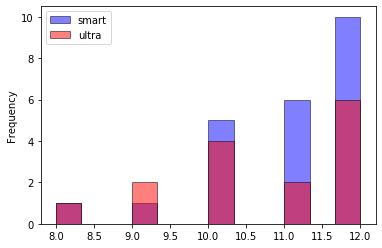

In [515]:
df_churn = df_users[~(df_users['churn_date'].isna())]
df_churn['churn_date'] = pd.to_datetime(df_churn['churn_date'], format='%Y-%m-%d', errors='ignore')
df_churn['churn_month'] = pd.DatetimeIndex(df_churn['churn_date']).month

df_churn_ultra = df_churn[df_churn['tariff']=='ultra']
df_churn_smart = df_churn[df_churn['tariff']=='smart']

fig, ax = plt.subplots()
df_churn_smart['churn_month'].plot(kind='hist', color='b', alpha=0.5, bins=12, edgecolor='black')
df_churn_ultra['churn_month'].plot(kind='hist', color='r', alpha=0.5, bins=12, edgecolor='black')

plt.legend(['smart', 'ultra'])

Чем больше абонентов тем больше отток

Проанализируем приток новых пользователей по месяцам

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


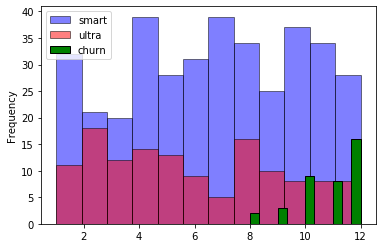

In [535]:
df_users['month'] = pd.DatetimeIndex(df_users['reg_date']).month

df_users_ultra = df_users[df_used['tariff']=='ultra']
df_users_smart = df_users[df_used['tariff']=='smart']

fig, ax = plt.subplots()
df_users_smart['month'].plot(kind='hist', color='b', alpha=0.5, bins=12, edgecolor='black')
df_users_ultra['month'].plot(kind='hist', color='r', alpha=0.5, bins=12, edgecolor='black')
df_churn['churn_month'].plot(kind='hist', color='g', alpha=1, bins=12, edgecolor='black')

plt.legend(['smart', 'ultra', 'churn'])

Количество новых пользователей в течении года по тарифам равномерное, в сумме на тарифе smart в выборке их больше

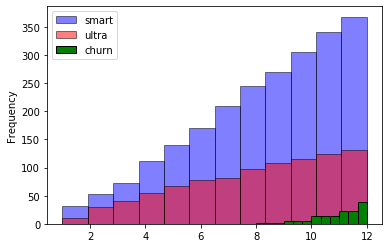

In [536]:
fig, ax = plt.subplots()
df_users_smart['month'].plot(kind='hist', color='b', alpha=0.5, bins=12, cumulative=True, edgecolor='black')
df_users_ultra['month'].plot(kind='hist', color='r', alpha=0.5, bins=12, cumulative=True, edgecolor='black')
df_churn['churn_month'].plot(kind='hist', color='g', alpha=1, bins=12, cumulative=True, edgecolor='black')
plt.legend(['smart', 'ultra', 'churn'])

Кумулятивно (накапливаемый со временем) тренд тарифа Смарт более крутой в отличии от Ультра, который к концу года замедляется

Проанализируем помесячную выручку с каждого пользователя по месяцам и по тарифам

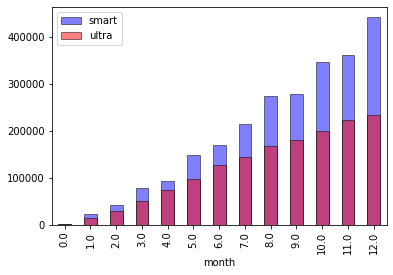

In [537]:
df_used.query('tariff=="smart"')\
.groupby('month')['total_earn']\
.sum()\
.plot(x= df_used['tariff'],
      y=df_used['total_earn'],
      kind='bar',
      color='b',
      alpha=0.5,
      edgecolor='black')
df_used.query('tariff=="ultra"')\
.groupby('month')['total_earn']\
.sum()\
.plot(x= df_used['tariff'],
      y=df_used['total_earn'],
      kind='bar',
      color='r',
      alpha=0.5,
      edgecolor='black')
plt.legend(['smart', 'ultra'])

Выручка от абонентов с тарифом Смарт повышается к концу года, в начале года разница в выручка была меньше
Очевидно, это влияние накопленных к концу года абонентов

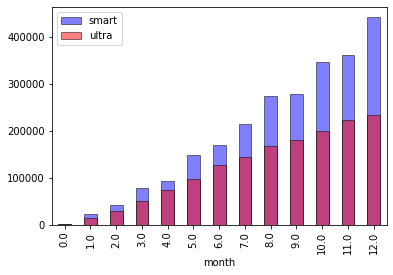

In [519]:
df_used.query('tariff=="smart"')\
.groupby('month')['total_earn']\
.sum()\
.plot(x= df_used['tariff'],
      y=df_used['total_earn'],
      kind='bar',
      color='b',
      alpha=0.5,
      edgecolor='black')
df_used.query('tariff=="ultra"')\
.groupby('month')['total_earn']\
.sum()\
.plot(x= df_used['tariff'],
      y=df_used['total_earn'],
      kind='bar',
      color='r',
      alpha=0.5,
      edgecolor='black')
plt.legend(['smart', 'ultra'])

В среднем за год выручка от Смарта выше чем от Ультра на 37.6%

В то же время пользователей на тарифе смарт в выборке в 2.8 раза больше

По этим показателям тариф смарт более прибыльный для оператора связи, можно посмотреть данные за 2019 год, но на данный момент (2018 год) тренд у тарифа Смарт восходящий и разница в выручке, если динамика сохраниться, будет увеличиваться

In [538]:
mean_smart = df_used.query('tariff=="smart"')\
.groupby('month')['total_earn']\
.sum()\
.mean()
mean_ultra = df_used.query('tariff=="ultra"')\
.groupby('month')['total_earn']\
.sum()\
.mean()
print(mean_smart)
print(mean_ultra)

190169.07692307694
118673.07692307692


In [539]:
100-(mean_ultra/mean_smart)*100

37.59601779469121

In [540]:
len(df_users_smart)/len(df_users_ultra)

2.787878787878788

## Анализ данных

### Расчет и оценка показателей описательной статистики по выборкам

Статистики звонков


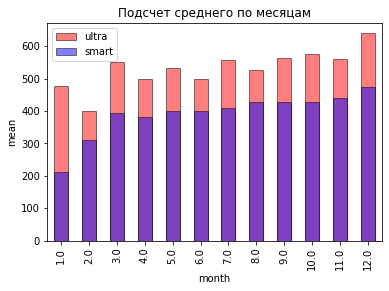

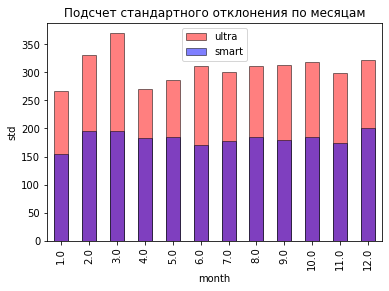

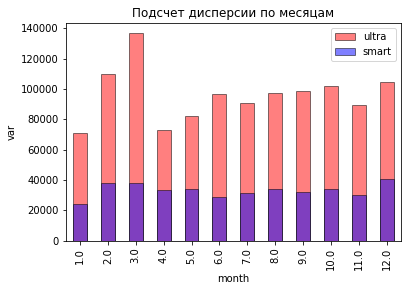

Статистики сообщений


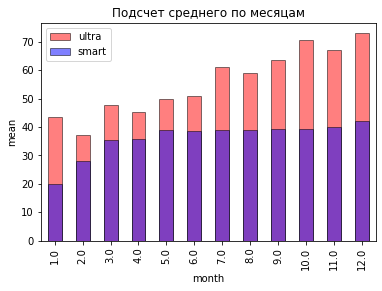

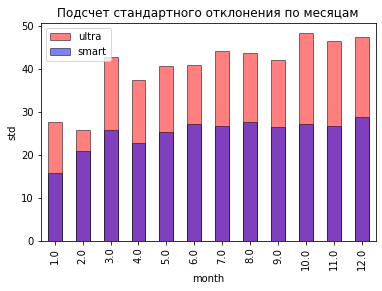

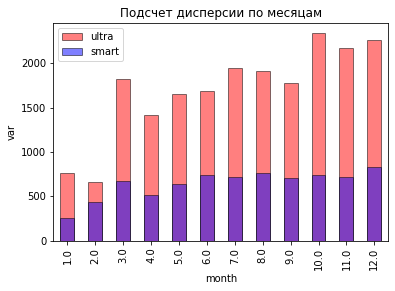

Статистики интернет трафик


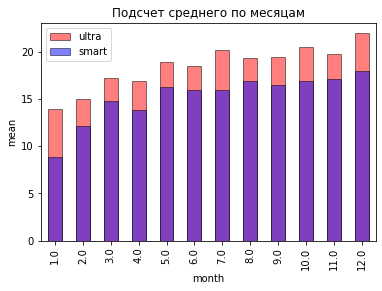

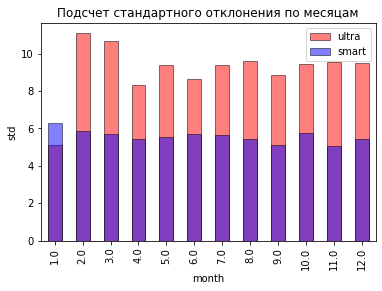

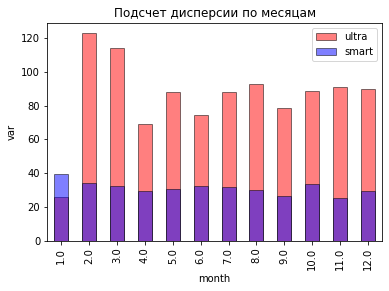

In [523]:
data_name_short = {'call_sum':'Статистики звонков',
                   'message_count':'Статистики сообщений',
                   'gb_used':'Статистики интернет трафик'}
def statist(data):
    df_used.query('tariff=="ultra"').groupby(['month'])[data].mean()[1:13].plot(x=df_used['month'],
          y=df_used[data],
          kind='bar',
          alpha=0.5,
          edgecolor='black',
          color='r')

    df_used.query('tariff=="smart"').groupby(['month'])[data].mean()[1:13].plot(x=df_used['month'],
          y=df_used[data],
          kind='bar',
          alpha=0.5,
          edgecolor='black',
          color='b')
    plt.title('Подсчет среднего по месяцам')
    plt.ylabel('mean')
    plt.legend(['ultra', 'smart'])
    plt.show()
    
    df_used.query('tariff=="ultra"').groupby(['month'])[data].std()[1:13].plot(x=df_used['month'],
          y=df_used[data],
          kind='bar',
          alpha=0.5,
          edgecolor='black',
          color='r')

    df_used.query('tariff=="smart"').groupby(['month'])[data].std()[1:13].plot(x=df_used['month'],
          y=df_used[data],
          kind='bar',
          alpha=0.5,
          edgecolor='black',
          color='b')
    plt.title('Подсчет стандартного отклонения по месяцам')
    plt.ylabel('std')
    plt.legend(['ultra', 'smart'])
    plt.show()
    
    (df_used.query('tariff=="ultra"').groupby(['month'])[data].std()**2)[1:13].plot(x=df_used['month'],
          y=df_used[data],
          kind='bar',
          alpha=0.5,
          edgecolor='black',
          color='r')

    (df_used.query('tariff=="smart"').groupby(['month'])[data].std()**2)[1:13].plot(x=df_used['month'],
          y=df_used[data],
          kind='bar',
          alpha=0.5,
          edgecolor='black',
          color='b')
    plt.title('Подсчет дисперсии по месяцам')
    plt.ylabel('var')
    plt.legend(['ultra', 'smart'])
    plt.show()
    
for name in data_name_short:
    print(data_name_short[name])
    statist(name)

В среднем количество минут на тарифах по месячно растет, стандартное отклонение и соответственно дисперсия с серидины года остаются примерно одинаковыми по месяцам

Абоненты с тарифом Смарт в среднем отправляют меньше сообщений чем на тарифе Ультра, и динамика изменения стандартного отклонения у Смарт значительно ниже. Очевидно, эта зависимость обусловлена количеством бесплатных минут на тарифах

По объему интернет трафика картина практически такая же, как и по звонкам. Стандартное отклонение к концу года даже понижается. Это говорит о том что месячное количество используемого интернета пользователями начинает больше консолидироваться вокруг среднего относительно середины года

In [524]:
df_used

,month,user_id,tariff,city,call_sum,call_count,gb_used,message_count,call_earn,mess_earn,inter_earn,fee,total_earn
0,0.00,1128,ultra,волжский,0.00,1,0.00,1,0.00,0,0.00,1950,"1,950.00"
1,0.00,1371,smart,омск,0.00,1,0.00,1,0.00,0,0.00,550,550.00
2,1.00,1005,smart,набережные челны,95.00,15,3.00,7,0.00,0,0.00,550,550.00
3,1.00,1032,smart,ульяновск,380.00,61,24.00,38,0.00,0,"1,800.00",550,"2,350.00"
4,1.00,1045,smart,улан-удэ,9.00,1,3.00,5,0.00,0,0.00,550,550.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,12.00,1493,ultra,красноярск,571.00,84,42.00,78,0.00,0,"1,800.00",1950,"3,750.00"
2665,12.00,1495,ultra,иркутск,"1,031.00",155,23.00,84,0.00,0,0.00,1950,"1,950.00"
2666,12.00,1496,smart,вологда,518.00,80,21.00,51,54.00,3,"1,200.00",550,"1,807.00"
2667,12.00,1497,smart,челябинск,545.00,71,20.00,17,135.00,0,"1,000.00",550,"1,685.00"


In [525]:
def histogram(data):
    df_used.query('tariff=="smart"')[data].hist(
          bins=50,
          edgecolor='black',
          color='b',
          alpha=0.7)
    plt.axvline(df_used.query('tariff=="smart"')[data].mean(), color='k', linestyle='dashed', linewidth=2)
    
    df_used.query('tariff=="ultra"')[data].hist(
          bins=50,
          edgecolor='black',
          color='r',
          alpha=0.7)
    plt.axvline(df_used.query('tariff=="ultra"')[data].mean(), color='r', linestyle='dashed', linewidth=2)

    
    plt.title('Гистограмма')
    plt.ylabel('frequency')
    plt.xlabel('value')
    plt.legend(['smart', 'ultra'])
    plt.show()
    print('Среднее тарифа Смарт', df_used.query("tariff=='smart'")[data].mean().round())
    print('Среднее тарифа Ультра', df_used.query("tariff=='ultra'")[data].mean().round())


Статистики звонков


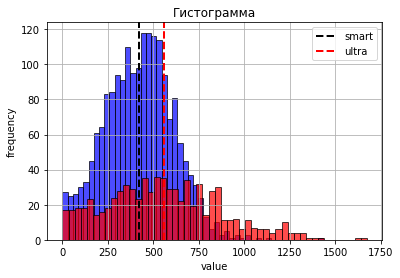

Среднее тарифа Смарт 421.0
Среднее тарифа Ультра 556.0

Статистики сообщений


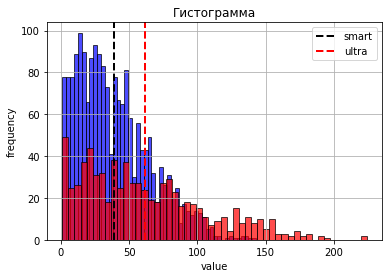

Среднее тарифа Смарт 39.0
Среднее тарифа Ультра 62.0

Статистики интернет трафик


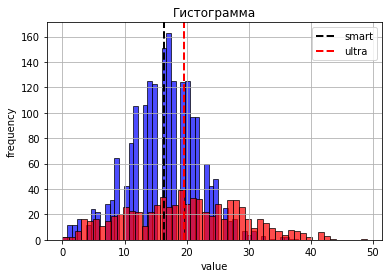

Среднее тарифа Смарт 16.0
Среднее тарифа Ультра 20.0


In [526]:
for name in data_name_short:
    print()
    print(data_name_short[name])
    histogram(name)

На гистограммах видим подтверждение статистик по месяцам:
- дисперсия и стандартное отклонение больше у тарифа Ультра
- среднее значение во всех случаях тоже больше у тарифа Ультра
- распределение по тарифу смарт больше напоминает колоколообразное, видимо из-за размера подвыборки Ультра (с увеличением выборки будет стремится к нормальному)
- гистограммы звонком и сообщений смещены влево, особенно сообщения, что говорит о частых случаях не использования опции

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза Ho: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличаются
Альтернативная гипотеза H1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличаются
Оцениваем среднии двух независимых выборок из генеральных совокупностей
Данные распределены равномерно и относятся к одной среде(области) можно применить t-критерий стьюдента
Уровень значимости alpha принимаем равным 5%

In [527]:
df_used.query('tariff=="smart"')['total_earn']
df_used.query('tariff=="ultra"')['total_earn']

0      1,950.00
8      1,950.00
12     1,950.00
26     1,950.00
28     1,950.00
         ...   
2650   1,950.00
2657   1,950.00
2662   1,950.00
2664   3,750.00
2665   1,950.00
Name: total_earn, Length: 753, dtype: float64

In [483]:
results = st.ttest_ind(df_used.query('tariff=="smart"')['total_earn'], df_used.query('tariff=="ultra"')['total_earn'])
print('p-значение: ', results.pvalue)

p-значение:  6.712445665282349e-120


p-value значительно меньше 5%, нулевую гипотезу можно отвергнуть.
Делаем вывод, что данные по средней выручке в 2018 году у пользователей тарифов «Ультра» и «Смарт» имеют статистически значимые отличия

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Выделим москвичей в датафрейме

In [529]:
df_used.query('city=="москва"')['total_earn']
df_used.query('city!="москва"')['total_earn']

0      1,950.00
1        550.00
2        550.00
3      2,350.00
4        550.00
         ...   
2664   3,750.00
2665   1,950.00
2666   1,807.00
2667   1,685.00
2668     598.00
Name: total_earn, Length: 2178, dtype: float64

In [530]:
len(df_used.query('city!="москва"')['total_earn'])

2178

In [531]:
len(df_used.query('city=="москва"')['total_earn'])

491

Нулевая гипотеза Ho: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
Альтернативная гипотеза H1: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Оцениваем среднии двух независимых выборок из генеральных совокупностей
Данные распределены равномерно и относятся к одной среде(области) можно применить t-критерий стьюдента
Уровень значимости alpha принимаем равным 5%

In [532]:
results = st.ttest_ind(df_used.query('city!="москва"')['total_earn'], df_used.query('city=="москва"')['total_earn'])
print('p-значение: ', results.pvalue)

p-значение:  0.12027719304133513


p-value больше 5%, нулевую гипотезу нельзя отвергнуть.
Делаем вывод, что данные по средней выручке в 2018 году по пользователям из Москвы не имеют статистически значимых отличий от пользователей из других регионов

## Общий вывод

Были рассмотрены два тарифных плана федерального оператора сотовой связи «Мегалайн» - «Смарт» и «Ультра».
Цель анализа - определить какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.
Для предварительного анализа тарифов была предоставлена небольшая выборка клиентов (500 пользователей) с указанием кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

В ходе анализа было ваполнено:

- поиск и заполнение/удаление пропусков
- поиск и очитска от дубликатов
- приведение типов данных
- подсчеты звонков, сообщений и интернет трафика
- подсчет ежемесячной выручки по тарифам
- расчет и оценка показателей описательной статистики
- проверены гипотезы о средних выручках пользователей

По результатам работы можно сделать следующие выводы:

- с августа начался рост оттока клиентов, необходимо проанализировать причины
- приток клиентов не растет
- кумулятивно абонентов на Смарт больше и их количество продолжает расти
- ежемесячная выручка от абонентов Смарт также растет и начиная с середины года суммарно больше чем от абонентов Ультра, и эта разница статистически значимая
- еще одной примечательной особенностью можно выделить что абоненты с тарифом Смарт в среднем отправляют меньше сообщений чем на тарифе Ультра, и динамика изменения стандартного отклонения у Смарт значительно ниже.

На данный момент номинально больше денег приносит тариф Смарт.